# Project: Predicting Heart Disease with Machine Learning Algorithms

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "darkgrid")

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**<u>Description of Columns</u>**

- `age`: age in years

- `sex`: sex (1 = male; 0 = female)

- `cp`: chest pain type (4 values)

    Value 0: typical angina
    
    Value 1: atypical angina
    
    Value 2: non-anginal pain
    
    Value 3: asymptomatic


- `tresttbps`: resting blood pressure(in mm Hg on admission to the hospital)

- `chol`: serum cholestoral in mg/dl

- `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- `restecg`: resting electrocardiographic results (values 0,1,2)

    Value 0: normal
    
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


- `thalach`: maximum heart rate achieved

- `exang`: exercise induced angina (1 = yes; 0 = no)

- `oldpeak` : ST depression induced by exercise relative to rest

- `slope`: the slope of the peak exercise ST segment

    Value 0: upsloping
    
    Value 1: flat
    
    Value 2: downsloping


- `ca`: number of major vessels (0-4) colored by flourosopy

- `thal`: Thalassemia a type of heart disease. Value 0 = Type 0; Value 1 = Type 1 ; Value 2 = Type 2; Value 3 = Type 3

- `tagret`: 0 = no heart diesease, 1 = heart diesease 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data[['age', 'trestbps','thalach', 'oldpeak']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**age**
- The mean age of the patients is around 54.366.

- The min age is 29 years and  max is 77 years.

- 25% of the patients are aged below 47.5 yrs, 50% below 55 years and 15% above 61 years.

**trestbps** 

The resting blood pressure of the patient. A normal blood pressure level is less than 120/80 mmHg.

- The mean blood pressure is around 131.623762 which is more than the normal blood pressure.

- The lowest blood pressure is 94 and the max is 200.

- Only 25% of the patients were having blood pressure  below 120 which is normal.

- 50% of the patients were having blood pressure below 130.

- 75% of the patients were having blood pressure below 140. A blood pressure of 130/80 is considered stage 1 high blood pressure.

- While 15% of the patients were having more than 140. They are at risk of having hypertension.

**thalach**

maximum heart rate achieved

- The mean value of heart rate is 149.65.

- The min and max value of heart rate is 71 and 202.

- 25% of the patients are having heart rate below 133.5, 50% of patient have heart rate below 153 , 75% have heart rate below 166 or 15% above 166 heart rate.

**oldpeak**

ST depression induced by exercise relative to rest

- The mean is 1.039604.

- The min and max is 0 and 6.2 respectively.

- 50% of the patients have below 0.8 and 75% below 1.6 or 15% above 1.6.

In [5]:
print('(row , columns):' + str(data.shape))
print(data.columns)

(row , columns):(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing null values in any of the columns.

In [7]:
data['target'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## Exploratory and Data Analysis :

**<u>Correlations of each features in dataset</u>**

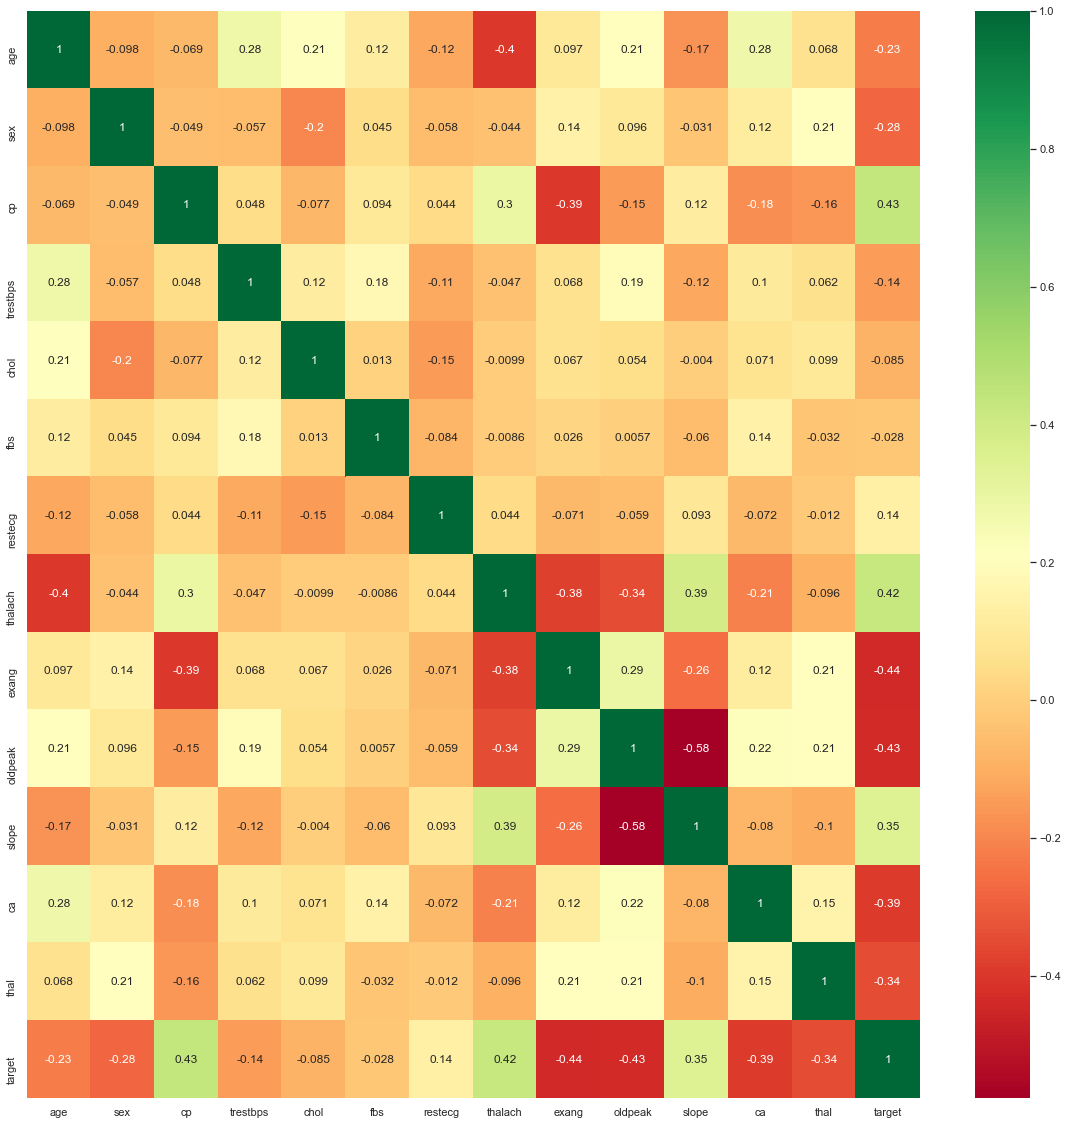

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

    There is a positive correlation between chest pain(cp) & target. This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. Cp has 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.

    There is positive correlation between thalach(maximum heart rate achieved) and target. This indicates that when a person is having a high heart rate he/she is prone to a heart attack.

    The highest negative correlation with our target is of exang(Excercise induce anigma). This angina symptoms occurs during moderate physical activity or when you are pushing yourself physically. As heart requires more blood, but narrowed arteries slow down blood flow. These symptoms go away with rest and/or medication.

**<u>Frequency distribution of variables in a data set.</u>**

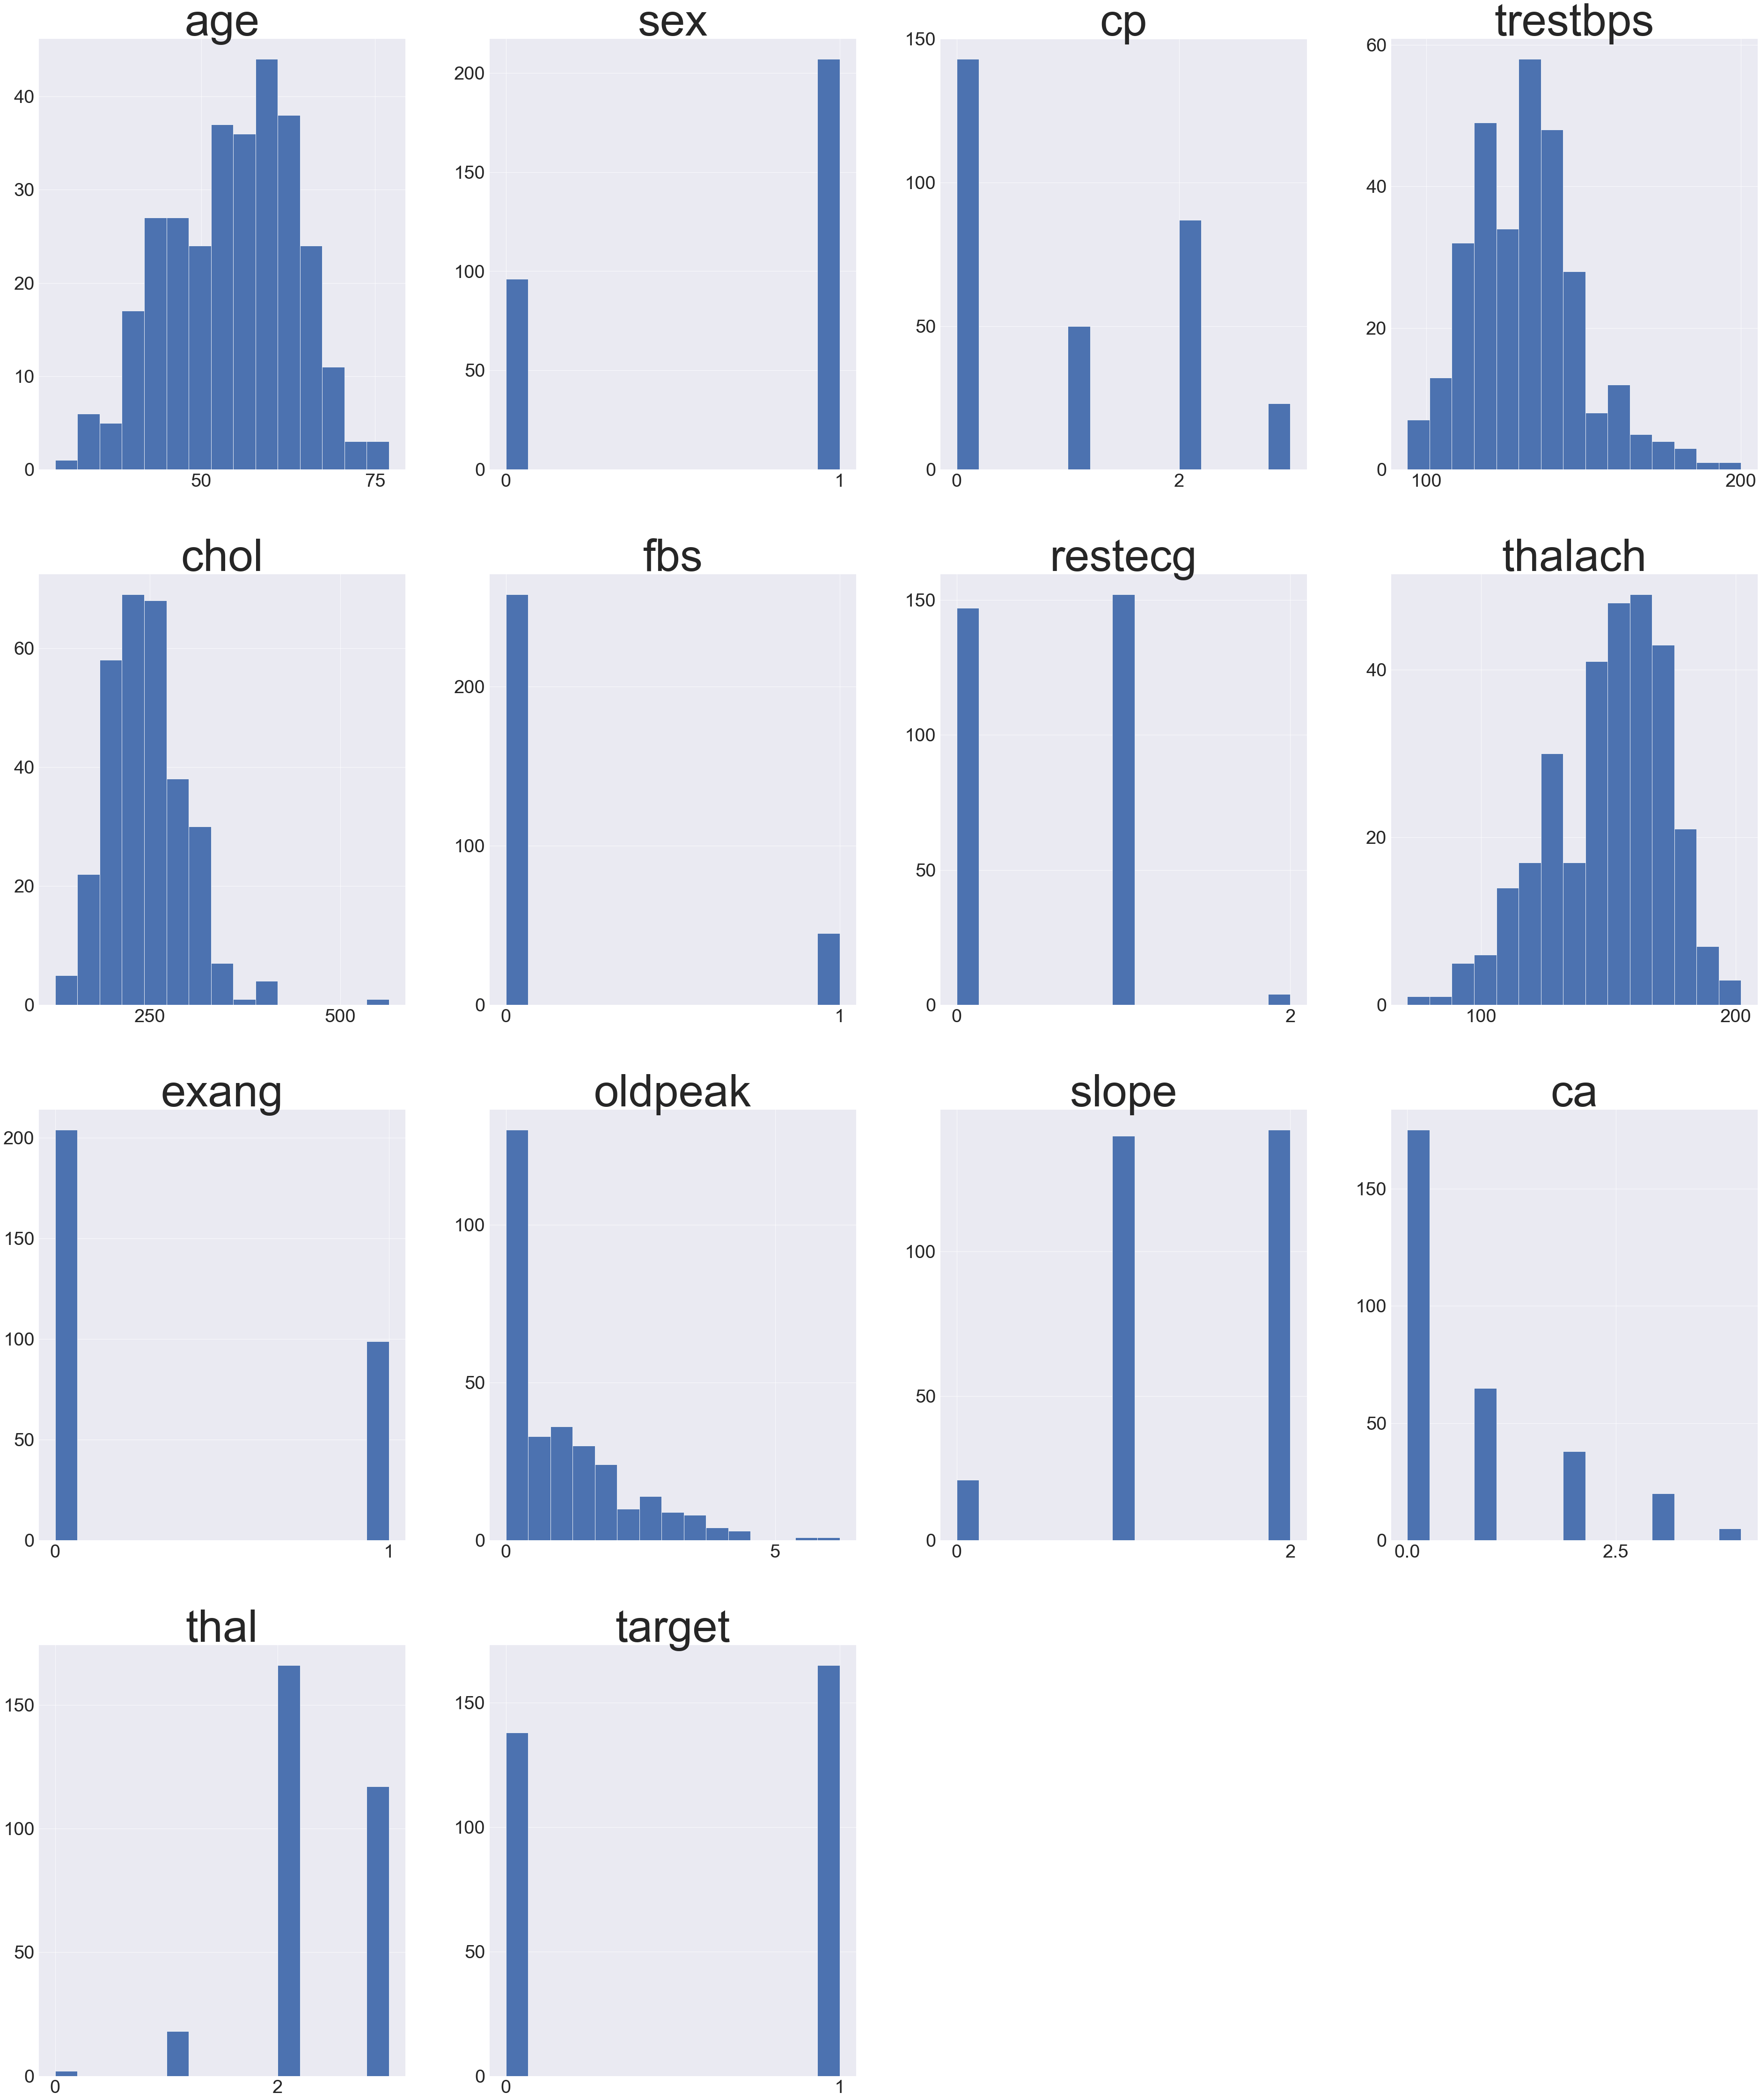

In [9]:
sns.set_context('paper',font_scale=10)
data.hist(figsize=(55,65), xlabelsize=40, ylabelsize=40, bins=15)
plt.tight_layout()
plt.show()

**Age**
    `Most of the patients are between the range of 50 - 60 years of age. `  
    
**Sex**
    `There is a huge difference between the number of males and females. The males are almost twice the number of the females.`
    
**cp**
    `Around half of the patients are having cp value=0,  Very few of them are having cp value 3.`    
    
**trestbps**
    `Most of the patients are having rest blood pressure in between 130-150.`
    
**chol**
    `Most of the patients having serum cholestoral  around 250. There is a slight peak above 500 which represents outliers in the cholestoral.`
    
**fbs**
    `This measures your blood sugar after an overnight fast (not eating). fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    Maximum patients have 0.`
    
**restecg**
    `The number of patients having  restecg 0(normal) or 1( having ST-T wave abnormality) is almost same. Only a handfull of them had a restecg value 2 showing probable or definite left ventricular hypertrophy by Estes' criteria.`
    
**thalach**
    `Most of the patienst were having maximum heart rate around 155 - 166`
    
**exang**
    `exercise induced angina (1 = yes; 0 = no). Around 69% of the patients were having value 0. They were not having excercised induce angina, while the rest were having excericse induce angina.Stable angina is usually triggered by physical activity. When you climb stairs, exercise or walk, your heart demands more blood, but narrowed arteries slow down blood flow.`
    
**oldpeak**
    `There is a high peak at 0 - 1 depression values. Meaning most of them have 0 depression levels.`
    
**slope**
    `the slope of the peak exercise ST segment. Most of the patients were having either a flat or a downsloping . Very minimal number of patients were having upsloping.`
    
**ca**
    `number of major vessels (0-3) colored by flourosopy. Maximum number of patients have 0 vessels colored by flourosopy.`
    
**thal**
    `A blood disorder called thalassemia. A large number of patients are having 2 and 3 values meaning they are suffering from different stages of thalassemia.`
    
**target**
    `It appears we have a good balance between the two target.`

In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Some of the datatypes aren't quite right. The code below changes them into categorical variables

In [11]:
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')

In [12]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

### Relations of the target with various features

**<u>Plot 1 : Age vs Presence of Heart Disease</u>**

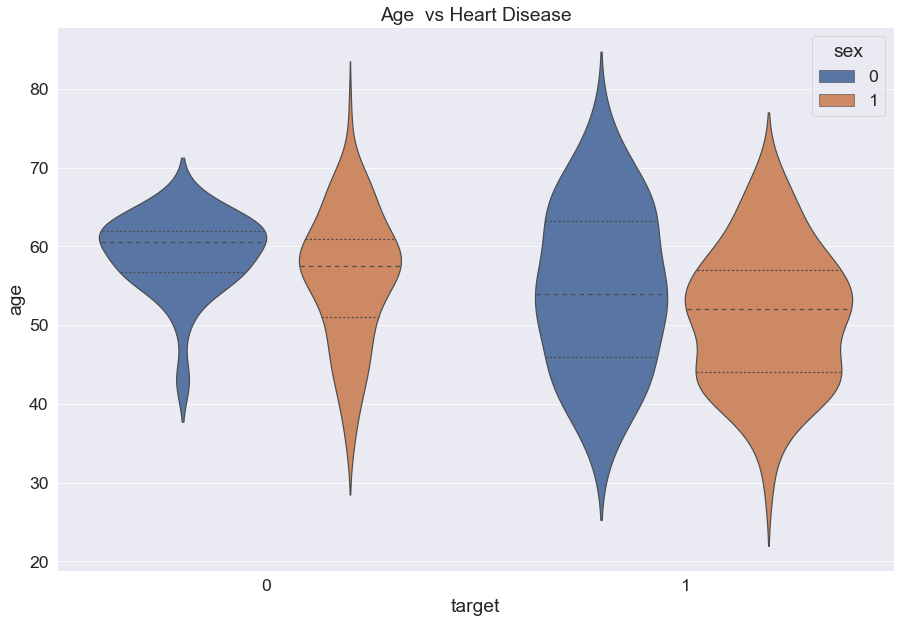

In [13]:
sns.set_context('paper',font_scale=2)
plt.figure(figsize=(15,10))
sns.violinplot(x='target', y='age',hue='sex',data =data, inner='quartile').set(title='Age  vs Heart Disease')
plt.show()

    For positive patients, the median age of both the gender is almost same. 75% of positive female patients are below 63 years approximately and in case of male positive patients 75% is below 58 years approximately. The distribution of the positive and negative patients can be seen clearly.

**<u>Plot 2 : Chest Pain vs Presence of Heart Disease</u>**

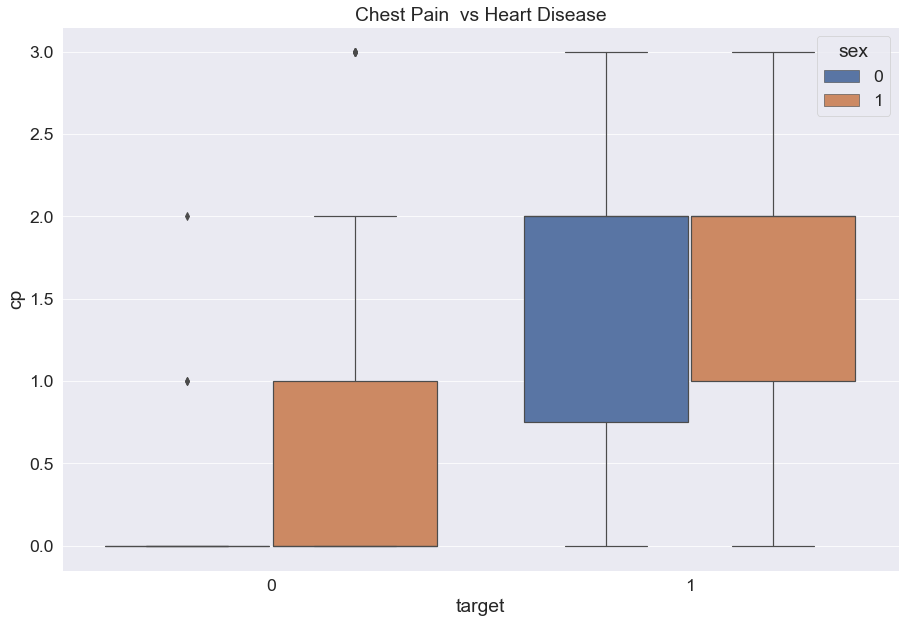

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='target', y ='cp', data=data, hue ='sex').set(title='Chest Pain  vs Heart Disease')
plt.show()

    The cp value = 1, 2, 3, 4 corresponds to  typical angina, atypical angina, non-anginal pain, asymptomatic. The positive patients of both the gender has median  of 2 which corresponds to atypical anigma. The median and the 3rd quartile of the positive patients of both the genders is same. This means that 75% of the positive patients is having atypical angina or typical angina.

**<u>Plot 3 : Thalach level vs Presence of Heart Disease</u>**

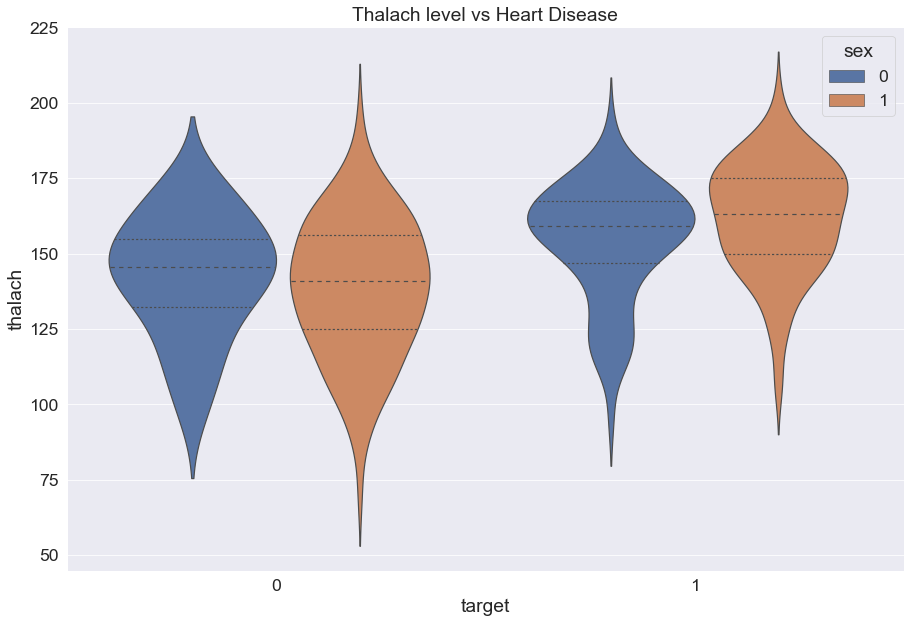

In [15]:
plt.figure(figsize=(15,10))
sns.violinplot(x='target', y ='thalach', data=data, hue ='sex', inner='quartile').set(title='Thalach level vs Heart Disease')
plt.show()


    The overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a higher median for thalach level(high heart rate ) compared to the negative patient. Thus it means they are suffering from heart diseases or prone to it. There is no significant differences between male & female target outcomes.

**<u>Plot 4 : ST depression level vs Presence of Heart Disease</u>**

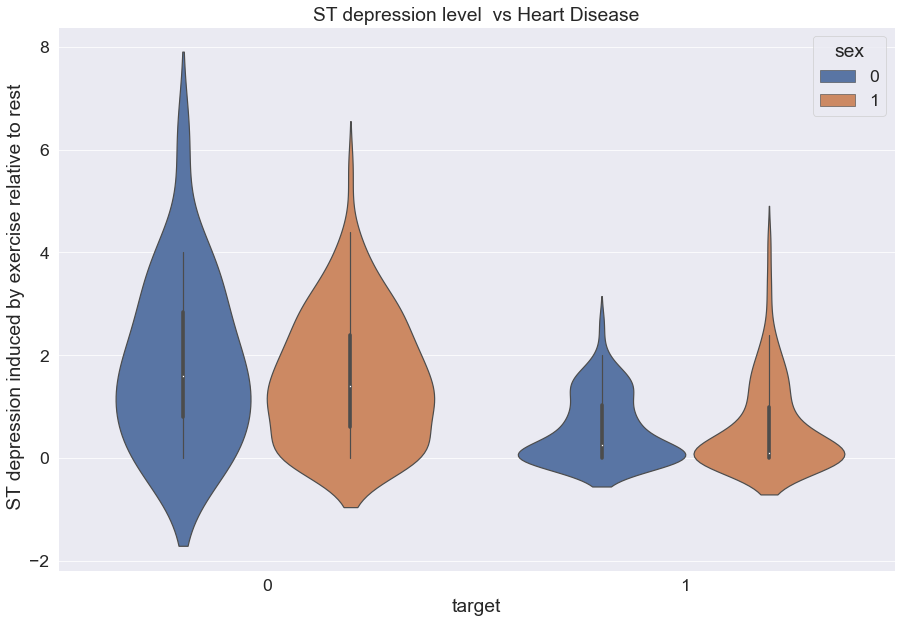

In [16]:
plt.figure(figsize=(15,10))
sns.violinplot(x='target', y ='oldpeak', data=data, hue ='sex').set(title='ST depression level  vs Heart Disease')
plt.ylabel(' ST depression induced by exercise relative to rest')
plt.show()

    The shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level. The male positive patients are distributed between 0 & 2, while negative patients are between 1 & 3.

## Data Processing

After exploring dataset I found that I need to convert some of the categorical variables into encoding before passing it into Machine Learning Models

In [17]:
dataset  = data.copy()

In [18]:
features, targets = dataset.drop('target', 1) , dataset['target']

<ipython-input-18-6c752245e798>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features, targets = dataset.drop('target', 1) , dataset['target']


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

In [20]:
transformers = [('one_hot_encoding', OneHotEncoder(categories= 'auto',  drop= 'first', sparse = False), 
                 [1, 2, 5, 6, 8,10, 12]), ('scaling', StandardScaler(), [0, 3, 4, 7, 9])]

Transformer = ColumnTransformer(transformers= transformers, remainder= 'passthrough')

Transformer.fit(features)

transformed_data = Transformer.transform(features)

joblib.dump(Transformer, 'Transformer.pkl')

['Transformer.pkl']

In [21]:
transformed_data

array([[ 1.        ,  0.        ,  0.        , ...,  0.01544279,
         1.08733806,  0.        ],
       [ 1.        ,  0.        ,  1.        , ...,  1.63347147,
         2.12257273,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.97751389,
         0.31091206,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.37813176,
         2.03630317,  2.        ],
       [ 1.        ,  0.        ,  0.        , ..., -1.51512489,
         0.13837295,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.0649749 ,
        -0.89686172,  1.        ]])

## Model Building

In [22]:
# importing preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# importing the models
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [23]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', 1), data['target'], 
                                                    test_size = 0.2, random_state=10)

<ipython-input-23-69c5e2f0806d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', 1), data['target'],


#### Helper Functions

In [24]:
def make_confusion_matrix(actual, prediction, model_name, group_names = None, categories = 'auto', count = True, percent = True,
                          cbar = True, xyticks = True, xyplotlabels = True, sum_stats = True, figsize = (10,8), 
                          cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    actual:        actual labels
    prediction:    predicted labels
    model_name:    Name of the model
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    percent:       If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    cf = confusion_matrix(actual, prediction)
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))*100
        error_rate = 100 - accuracy
        
        precision = cf[1,1] / sum(cf[:,1])*100
        recall    = cf[1,1] / sum(cf[1,:])*100
        f1_score  = 2*precision*recall / (precision + recall)
        
        stats_text = "\n\nAccuracy={:0.2f}%\nError Rate={:0.2f}%\nPrecision={:0.2f}%\nRecall={:0.2f}%\nF1 Score={:0.2f}".format(
            accuracy,error_rate,precision,recall,f1_score)
        
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    plt.title('Confusion Matrix')
    plt.savefig('images\Confusion Matrix of ' + model_name)

### Model 1 : DecisionTree Classifier 

In [25]:
DT_clf = DecisionTreeClassifier()

In [26]:
DT_clf.fit(X_train, y_train)

print("DecisionTree model accuracy(in %): {:.2f}%" .format(DT_clf.score(X_test, y_test)*100))

DecisionTree model accuracy(in %): 72.13%


**<u>Hyperparameter tuning of DecisionTree model using grid search</u>**

In [27]:
# dictionary of the parameters and their values
param_grid = {'criterion': ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'max_depth': [2, 4, 8, 20], 
                  'min_samples_leaf': [2, 5, 7], 'min_samples_split' : [2, 5, 7]}

grid_search = GridSearchCV(DT_clf, param_grid, cv = 5, n_jobs = -1, verbose = 1)

In [28]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 20],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [29]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'random'}

In [30]:
# best score
grid_search.best_score_

0.8350340136054422

    After tuning the hyperparameter the DecisionTree Model score have been improved alot. So I will passed the above best parameters to the DecsionTreeClassifier to build a model. 

In [31]:
# training the decision model on best parameters we got from grid search
dtree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf= 7, min_samples_split = 7,
                                  splitter= 'random')

dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=7,
                       min_samples_split=7, splitter='random')

In [32]:
dt_yprediction = dtree_clf.predict(X_test)

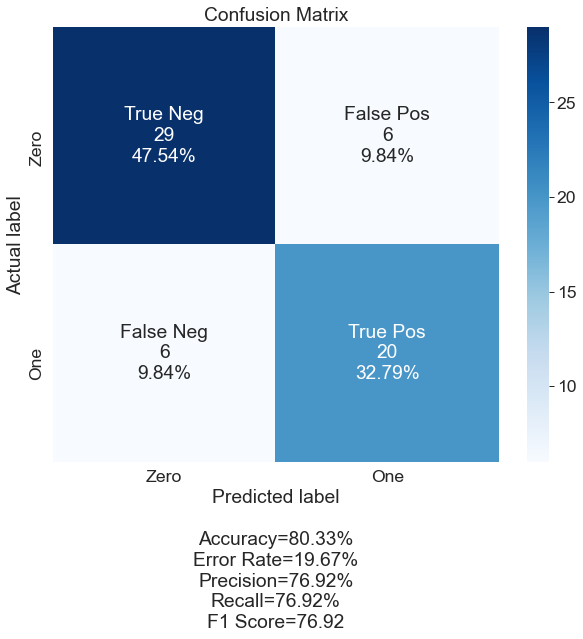

In [33]:
make_confusion_matrix(y_test, dt_yprediction,'DecisionTree', group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

    Our final accuracy on the test data after fine tuning is less than the training data. But its still more than the accuracy of the model with random parameters. Accuracy however doesn't gives us a clear picutre alone. We need to consider the Precision too. Our Precision is well above 75% which is good.

In [34]:
Model1_auc = roc_auc_score(y_test, dt_yprediction)

Model1_fpr, Model1_tpr, Model1_thresholds = roc_curve(y_test, dt_yprediction)

plot_roc_curve(fpr, tpr, thresholds, auc)

### Model 2 : RadomForest Model

In [35]:
forest_clf = RandomForestClassifier(random_state= 20)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

In [36]:
print("RandomForest model  model accuracy(in %): {:.2f}%" .format(forest_clf.score(X_test, y_test)*100))

RandomForest model  model accuracy(in %): 78.69%


**<u>Hyperparameter tuning of RandomForest Model using GridSearchCV</u>**

In [37]:
# dictionary of the parameters and their values
grid_param = {'n_estimators' : [2, 4 ,7, 10], 'criterion': ['gini', 'entropy'],
              'max_depth' : [2, 4, 6, 20], 'min_samples_leaf' : [2, 4, 6, 10],
              'min_samples_split': [2, 4, 6, 8, 10], 'max_features' : ['auto','log2']}


grid_search = GridSearchCV(estimator= forest_clf, param_grid = grid_param, cv = 5 ,n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed:   13.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 20],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [2, 4, 7, 10]},
             verbose=1)

In [38]:
# best parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [39]:
# best score
grid_search.best_score_

0.851530612244898

    After fine tuning the RandomForest model the accuracy have been increased to 85.15% from 78.69%.

In [40]:
# training the RandomForest Model on the best parameters

forest_clf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 6, max_features = 'auto',
                                    min_samples_leaf= 2, min_samples_split= 6, random_state= 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=10, random_state=42)

In [41]:
rf_yprediction = forest_clf.predict(X_test)

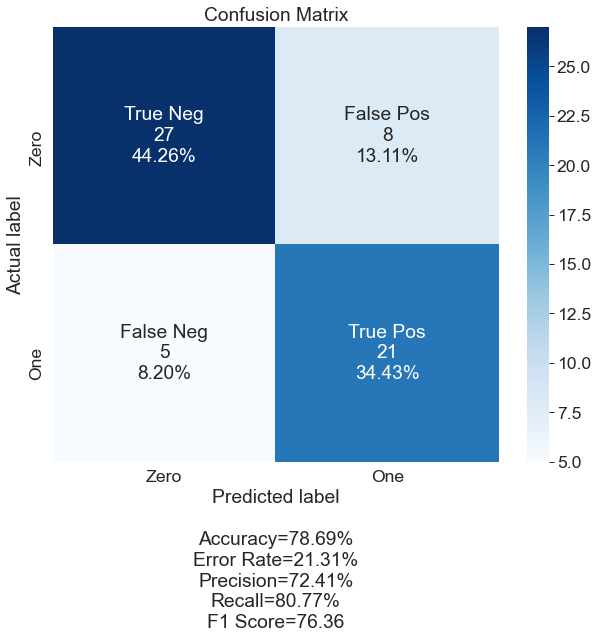

In [42]:
make_confusion_matrix(y_test, rf_yprediction,'RandomForest', group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

    Even after the fine tuning of the model the accuracy on the training data is same. The Accuracy on training data is around 85.15%. This is the result of model overfitting or due to the less amount of datas available for the RandomForest Model to trained.

In [43]:
Model2_auc = roc_auc_score(y_test, rf_yprediction)

Model2_fpr, Model2_tpr, Model2_thresholds = roc_curve(y_test, rf_yprediction)

### Model 3 : KNN classifier Model

In [44]:
# finding the optimum values  of k from a range of numbers
knn_score = []

for k in range(2, 20):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_clf, X_train, y_train, n_jobs=-1, cv=10,)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

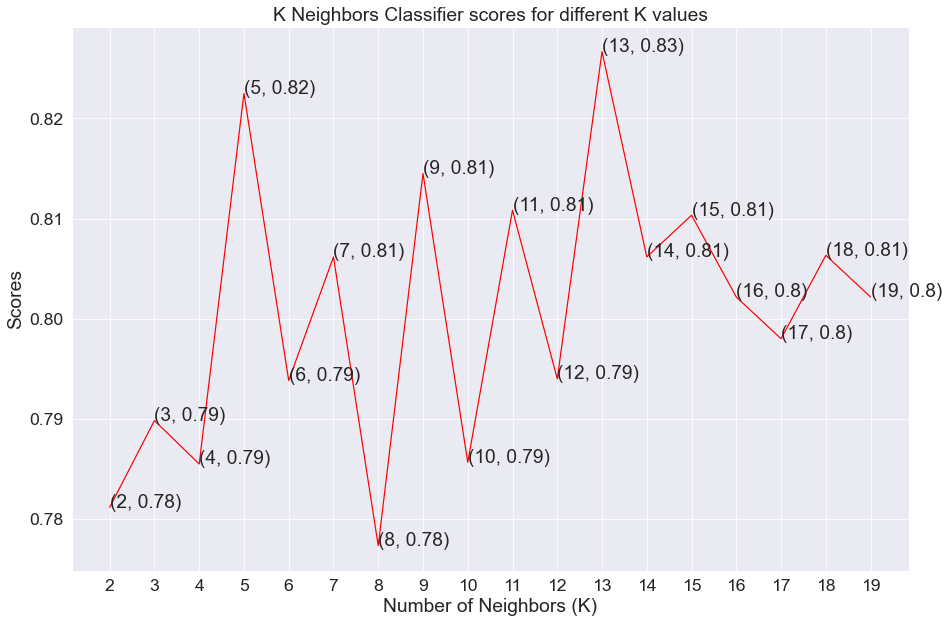

In [45]:
plt.figure(figsize=(15,10))
plt.plot([k for k in range(2, 20)], knn_score, color = 'red')
for i in range(2,20):
    plt.text(i, knn_score[i-2], (i, round(knn_score[i-2], 2)))
plt.xticks([i for i in range(2, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [46]:
grid_param = {'n_neighbors': [5, 9, 13], 'p': [1,2], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(estimator = knn_clf, param_grid = grid_param, cv = 10, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': [5, 9, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [47]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [48]:
grid_search.best_score_

0.8394999999999999

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [50]:
knn_yprediction = knn_clf.predict(X_test)

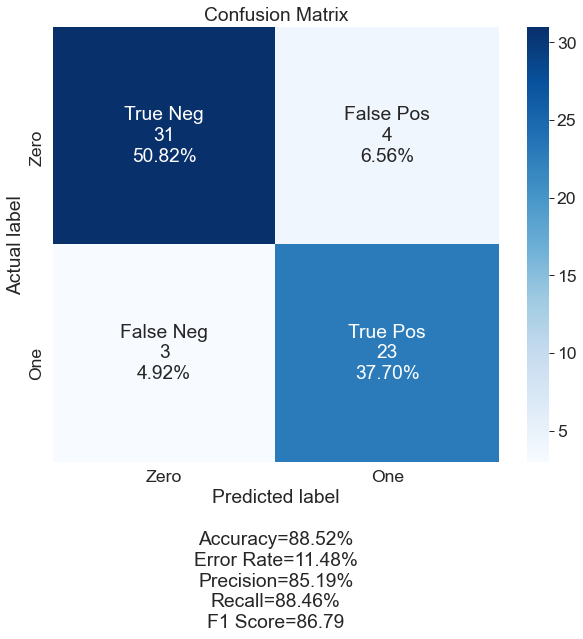

In [51]:
make_confusion_matrix(y_test, knn_yprediction,'KNN classifier', 
                      group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

    KNN model is having accuracy of 88.52% and both the Precision and Recall are high too. Thus the model is perfectly generalised to unseen data.

In [52]:
Model3_auc = roc_auc_score(y_test, knn_yprediction)

Model3_fpr, Model3_tpr, Model3_thresholds = roc_curve(y_test, knn_yprediction)

### Model 4 : SVC Model

In [53]:
svc=SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

In [54]:
print("SVC model accuracy(in %): {:.2f}%" .format(svc.score(X_test, y_test)*100))

SVC model accuracy(in %): 81.97%


**<u>Hyperparameter tuning of SVC Model using GridSearchCV</u>**

In [55]:
# dictionary of the parameters and their values
grid_param = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(estimator = svc, param_grid = grid_param, cv = 10, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    1.1s finished


GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [56]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [57]:
grid_search.best_score_

0.8393333333333333

In [58]:
svc = SVC(C=1, gamma=0.1, kernel='rbf', random_state=1)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=1)

In [59]:
svc_yprediction = svc.predict(X_test)

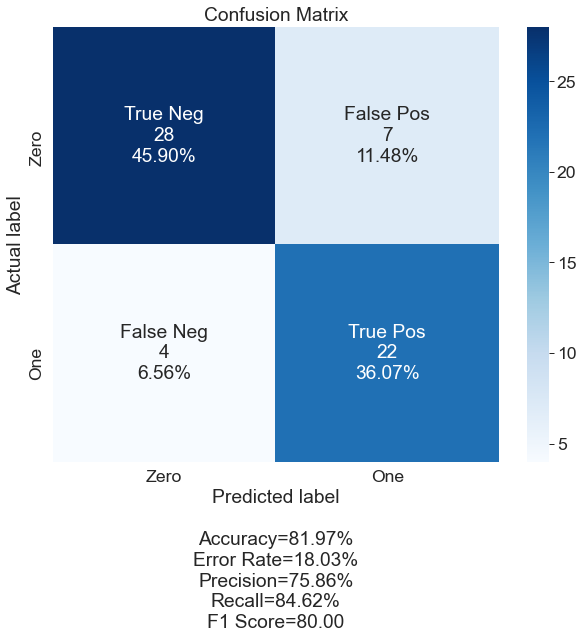

In [60]:
make_confusion_matrix(y_test, svc_yprediction,'SVC', group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

    The accuracy is 81.97%. The Recall is 84.62% which indicates that the class is correctly recognized and there is small number of False Negative. The Precision is 75.86% which is lower than Recall. It means that there is more False Positive compared to False Negative. 

In [61]:
Model4_auc = roc_auc_score(y_test, svc_yprediction)

Model4_fpr, Model4_tpr, Model4_thresholds = roc_curve(y_test, svc_yprediction)

**Plotting the roc curve of all the models**

In [67]:
fpr = [Model1_fpr, Model2_fpr, Model3_fpr, Model4_fpr]
tpr = [Model1_tpr, Model2_tpr, Model3_tpr, Model4_tpr]
threshold = [Model1_thresholds, Model2_thresholds, Model3_thresholds, Model4_thresholds]
auc = [Model1_auc, Model2_auc, Model3_auc, Model4_auc]
color = ['orange', 'blue', 'green', 'purple']
name = ['DecisionTree', 'RandomForest', 'KNN', 'SVC']

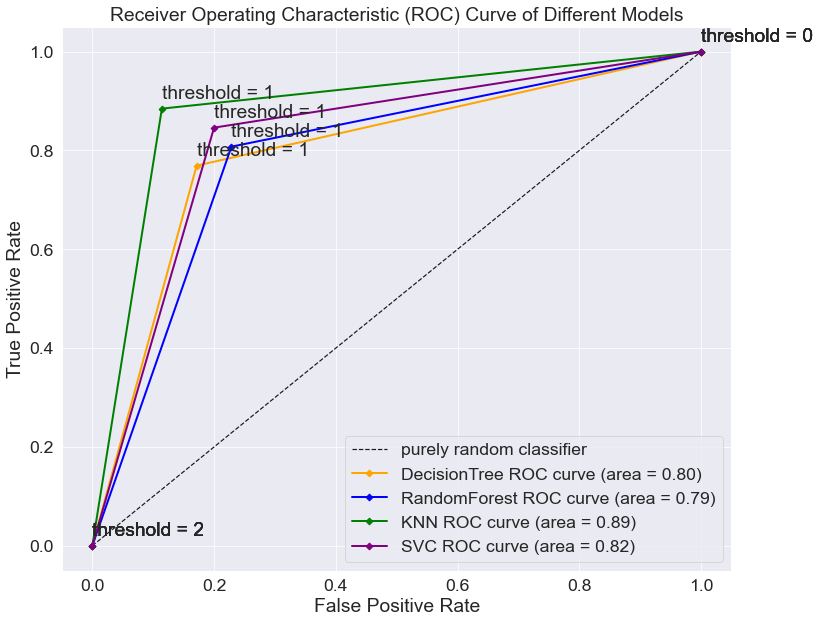

In [71]:
plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1],'k--' ,label='purely random classifier')
for i in range(0,4):
    plt.plot(fpr[i], tpr[i], color = color[i], marker = 'D', lw=2,label= name[i]+' ROC curve (area = %0.2f)' % auc[i])
    
    for j in range(0,3):
        plt.annotate('threshold = '+str(threshold[i][j]), (fpr[i][j], tpr[i][j]+0.02))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Different Models')
plt.legend(loc=4)

    From comparing the 4 models, I can conclude that Model 3: KNN model yields the highest accuracy. With an accuracy of 88.52%. The precision and recall is 85.19% , 88.46% respecitvely . The model predicted only had 4 False Positive and 3 False Negative. Finally from  ROC curve it is clearly evident that KNN model is the best among all. It has roc curve area of 0.89.

## Saving the KNN model

In [75]:
joblib.dump(knn_clf, 'KNNmodel.pkl')

['KNNmodel.pkl']

Go to https://heartdiseaseprediction1.herokuapp.com/predict to use the web api.